In [20]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from lib import Compressors
import torch
import matplotlib.pyplot as plt
import pickle

size = 16
size_label = 14
dig_size=12

In [21]:
with open('../results/initialization/singulars.pkl', 'rb') as file:
    logs = pickle.load(file)

In [22]:
sorted_data = {
    'q_proj': [],
    'k_proj': [],
    'v_proj': [],
    'o_proj': [],
    'up_proj': [],
    'down_proj': []
}

for key, value in logs['W_s'].items():
    category = key.split('.')[-1]

    layer_num = int(key.split('.')[2])
    
    sorted_data[category].append((layer_num, value))

for category in sorted_data:
    sorted_data[category].sort(key=lambda x: x[0])

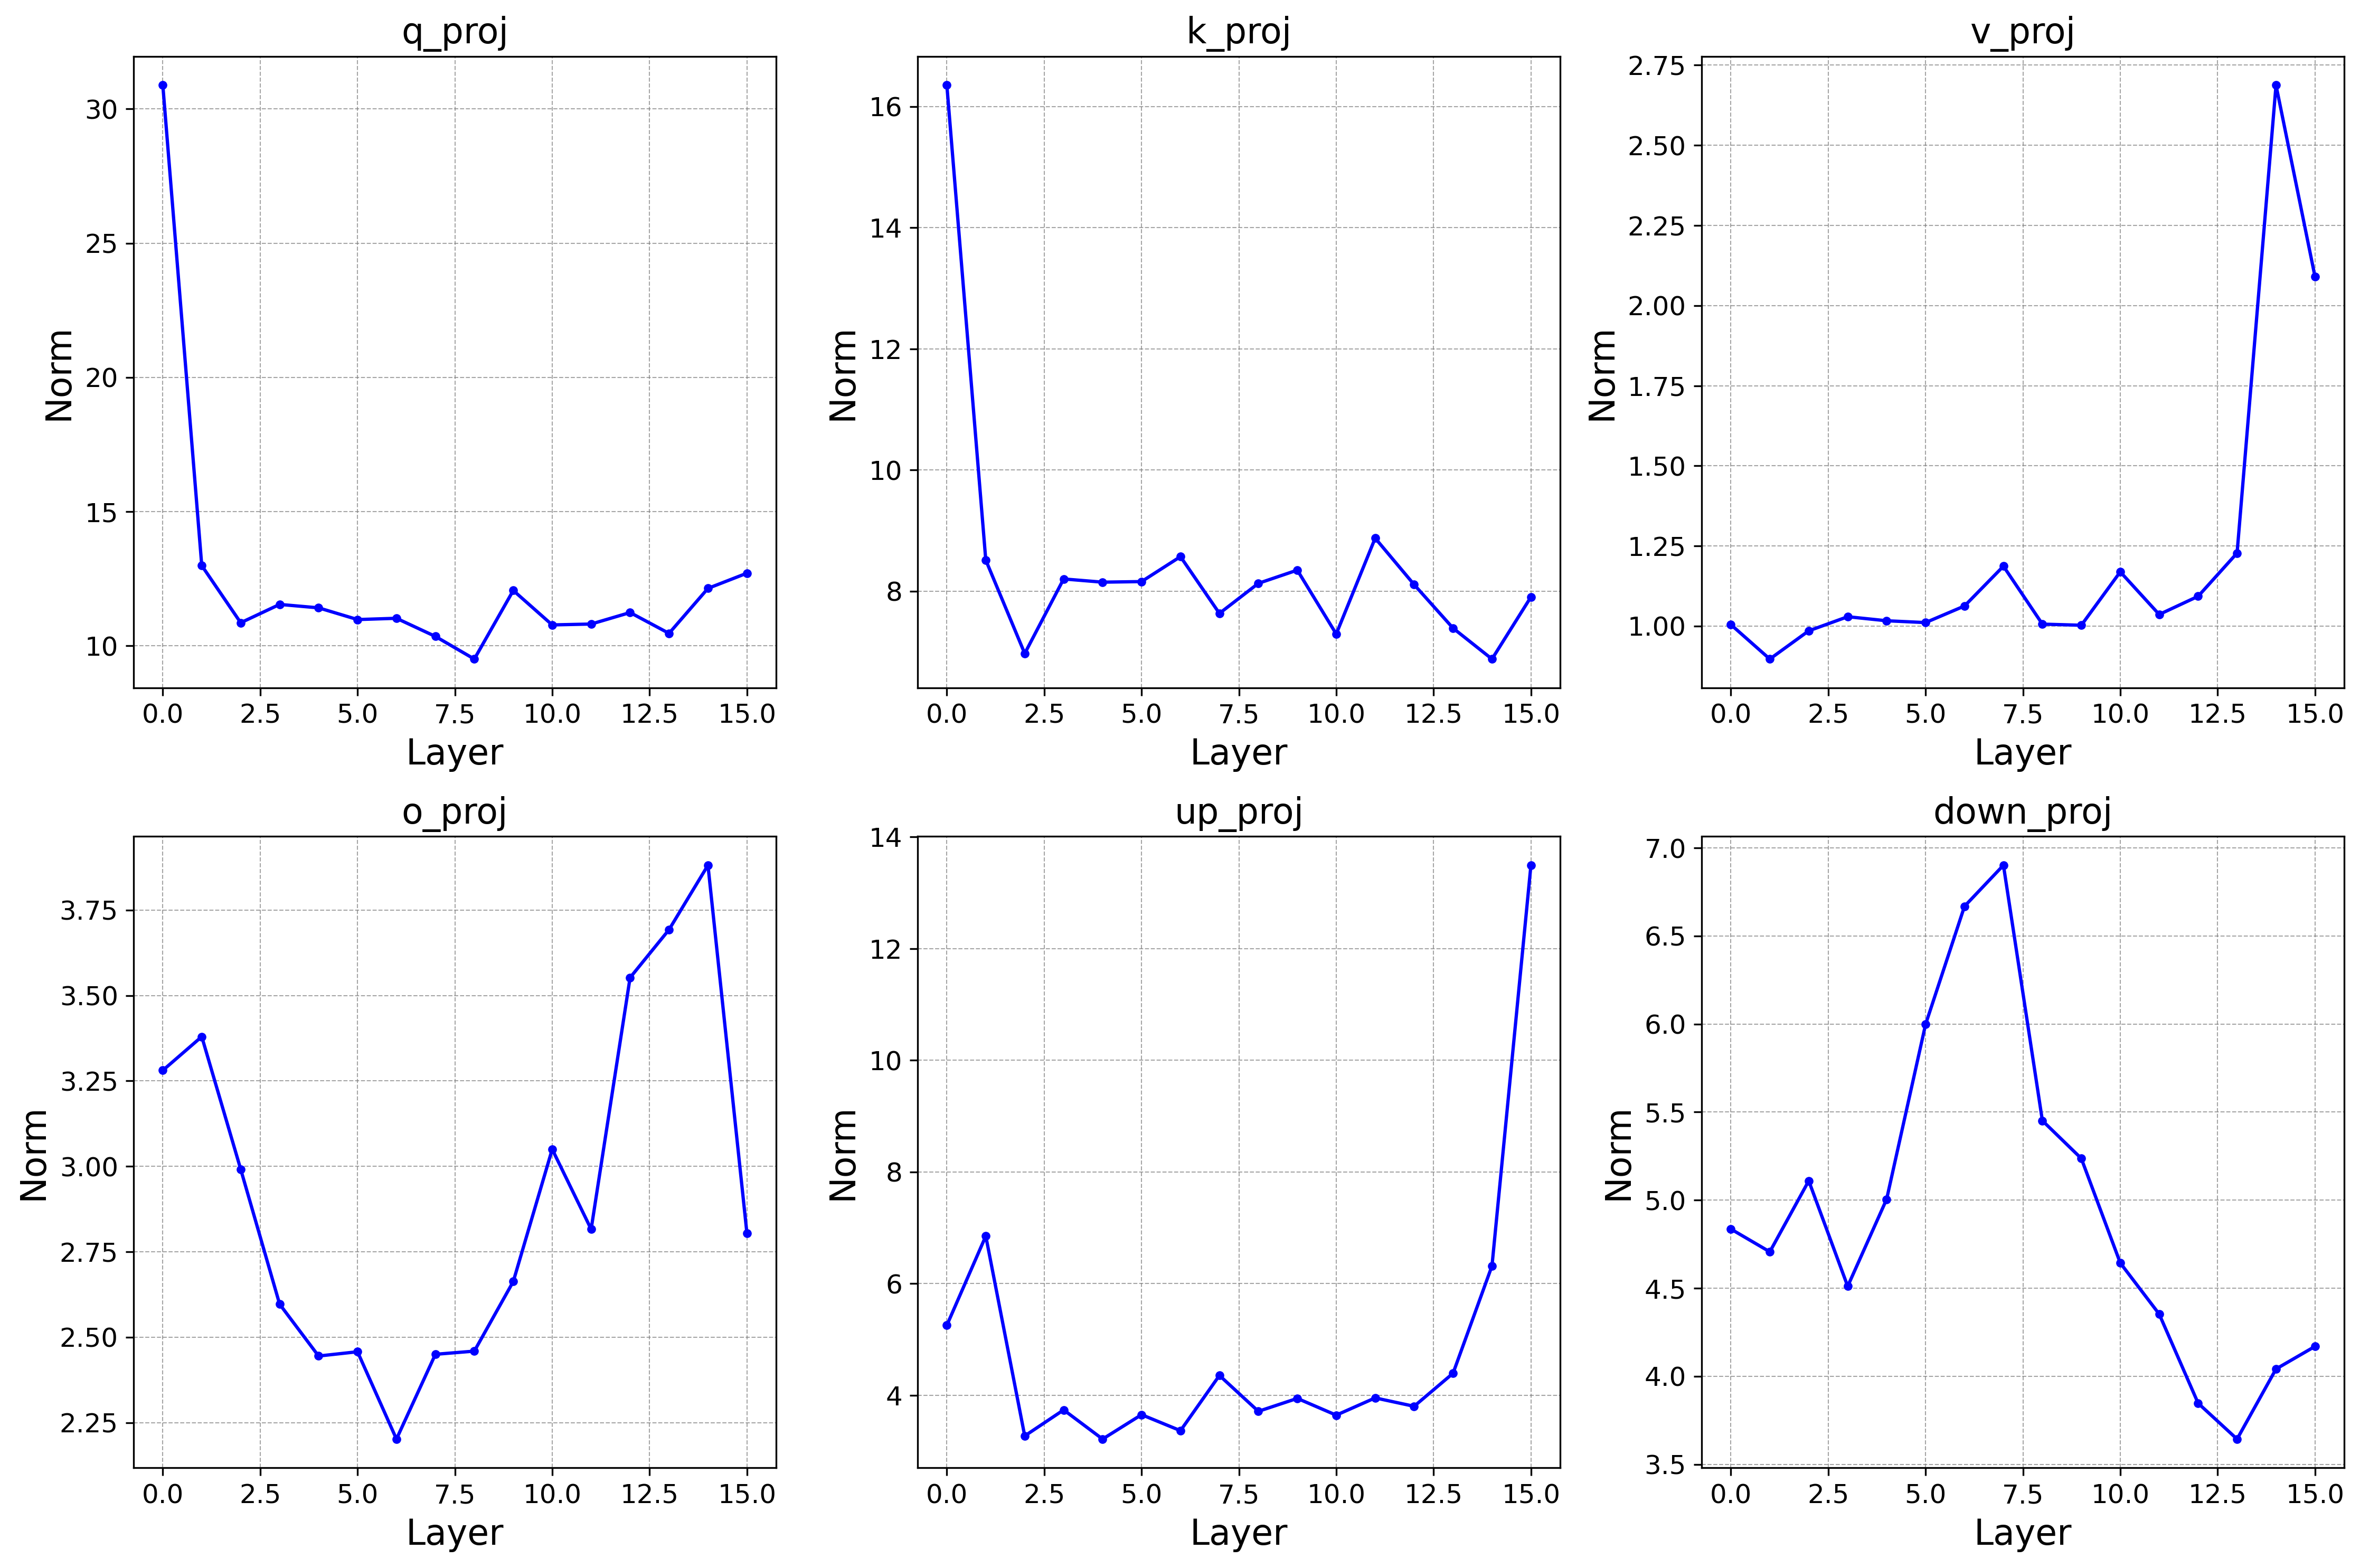

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=300)

categories = list(sorted_data.keys())


for i, category in enumerate(categories):
    ax = axes[i // 3, i % 3]
    layers, values = zip(*sorted_data[category])
    
    max_values = [v[0] for v in values]

    ax.plot(layers, max_values, marker='.', color='blue')

    ax.set_title(category, fontsize=size)
    ax.set_xlabel('Layer', fontsize=size)
    ax.set_ylabel('Norm', fontsize=size)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=dig_size)

plt.tight_layout()
plt.savefig('./images/llama_max_sing.pdf', format='pdf', dpi=300)

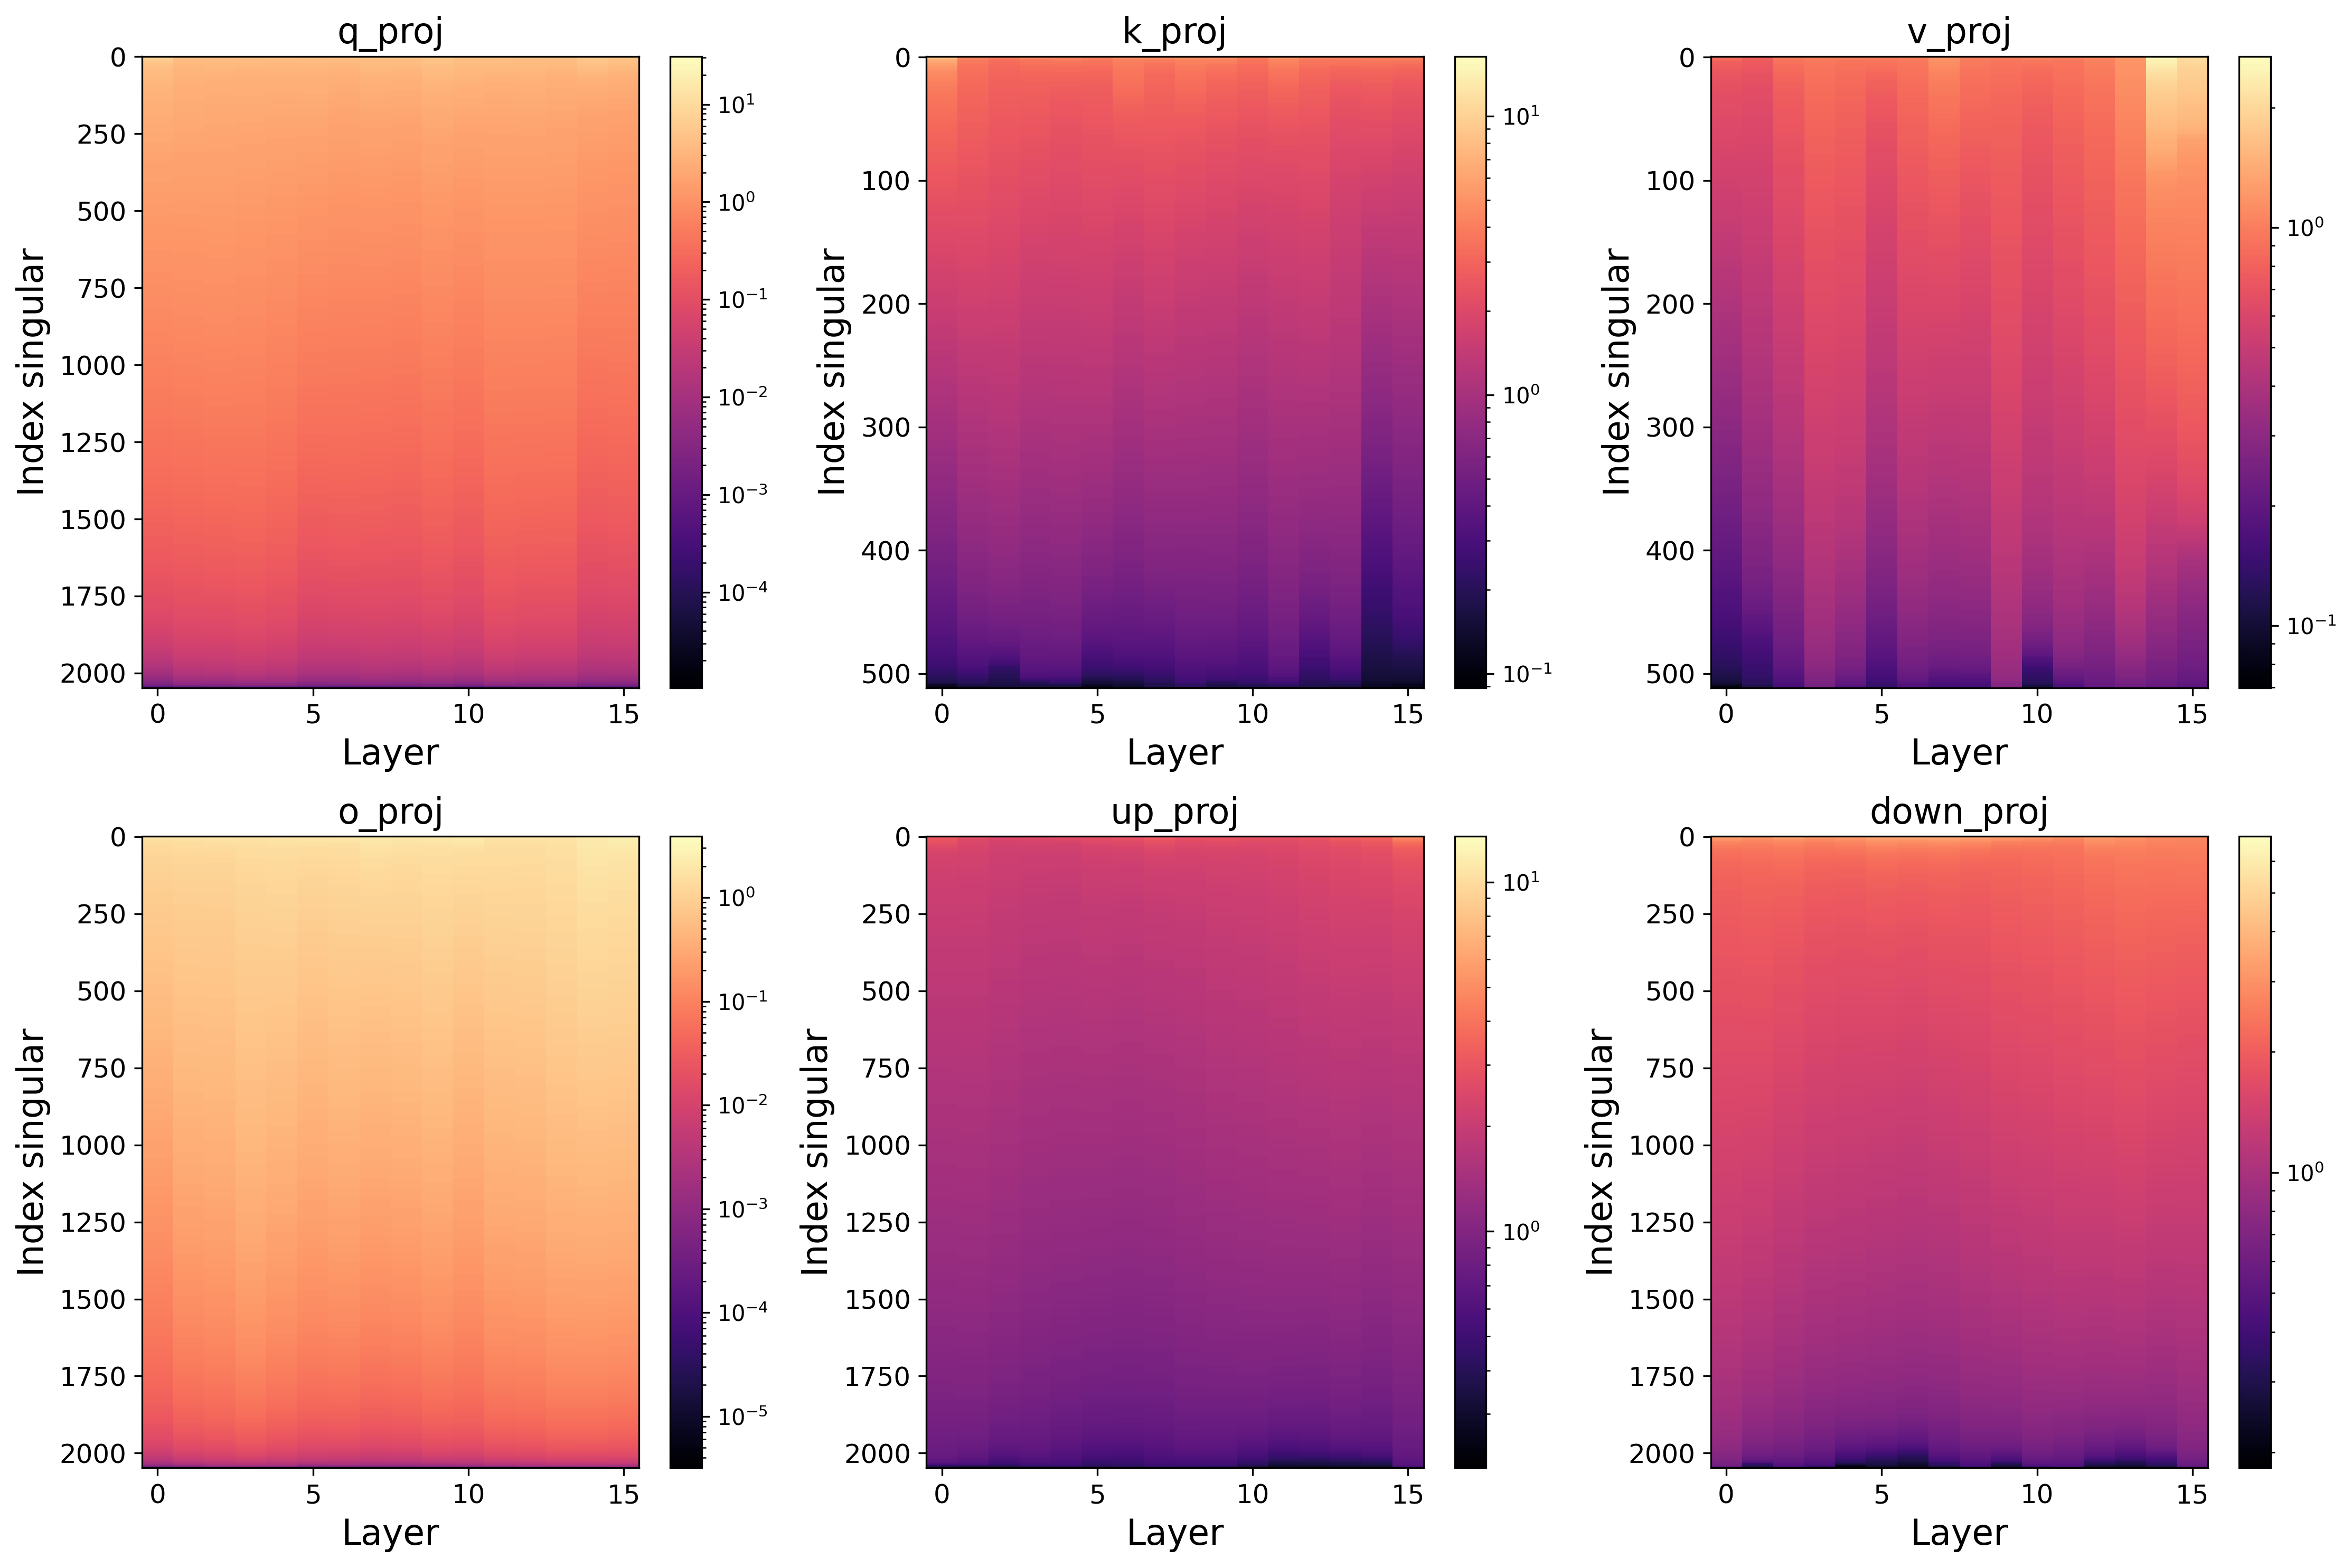

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm


fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=300)

for i, category in enumerate(categories):
    ax = axes[i // 3, i % 3]
    layers, values = zip(*sorted_data[category])

    data = np.array([v for v in values])

    cax = ax.imshow(data.T, cmap='magma', origin='upper', aspect='auto', interpolation='nearest', norm=LogNorm())
    
    fig.colorbar(cax, ax=ax)
    
    ax.set_title(category, fontsize=size)
    ax.set_xlabel('Layer', fontsize=size)
    ax.set_ylabel('Index singular', fontsize=size)
    ax.tick_params(axis='both', which='major', labelsize=dig_size)

plt.tight_layout()
plt.savefig('./images/cmap_llama_sing.pdf', format='pdf', dpi=300)

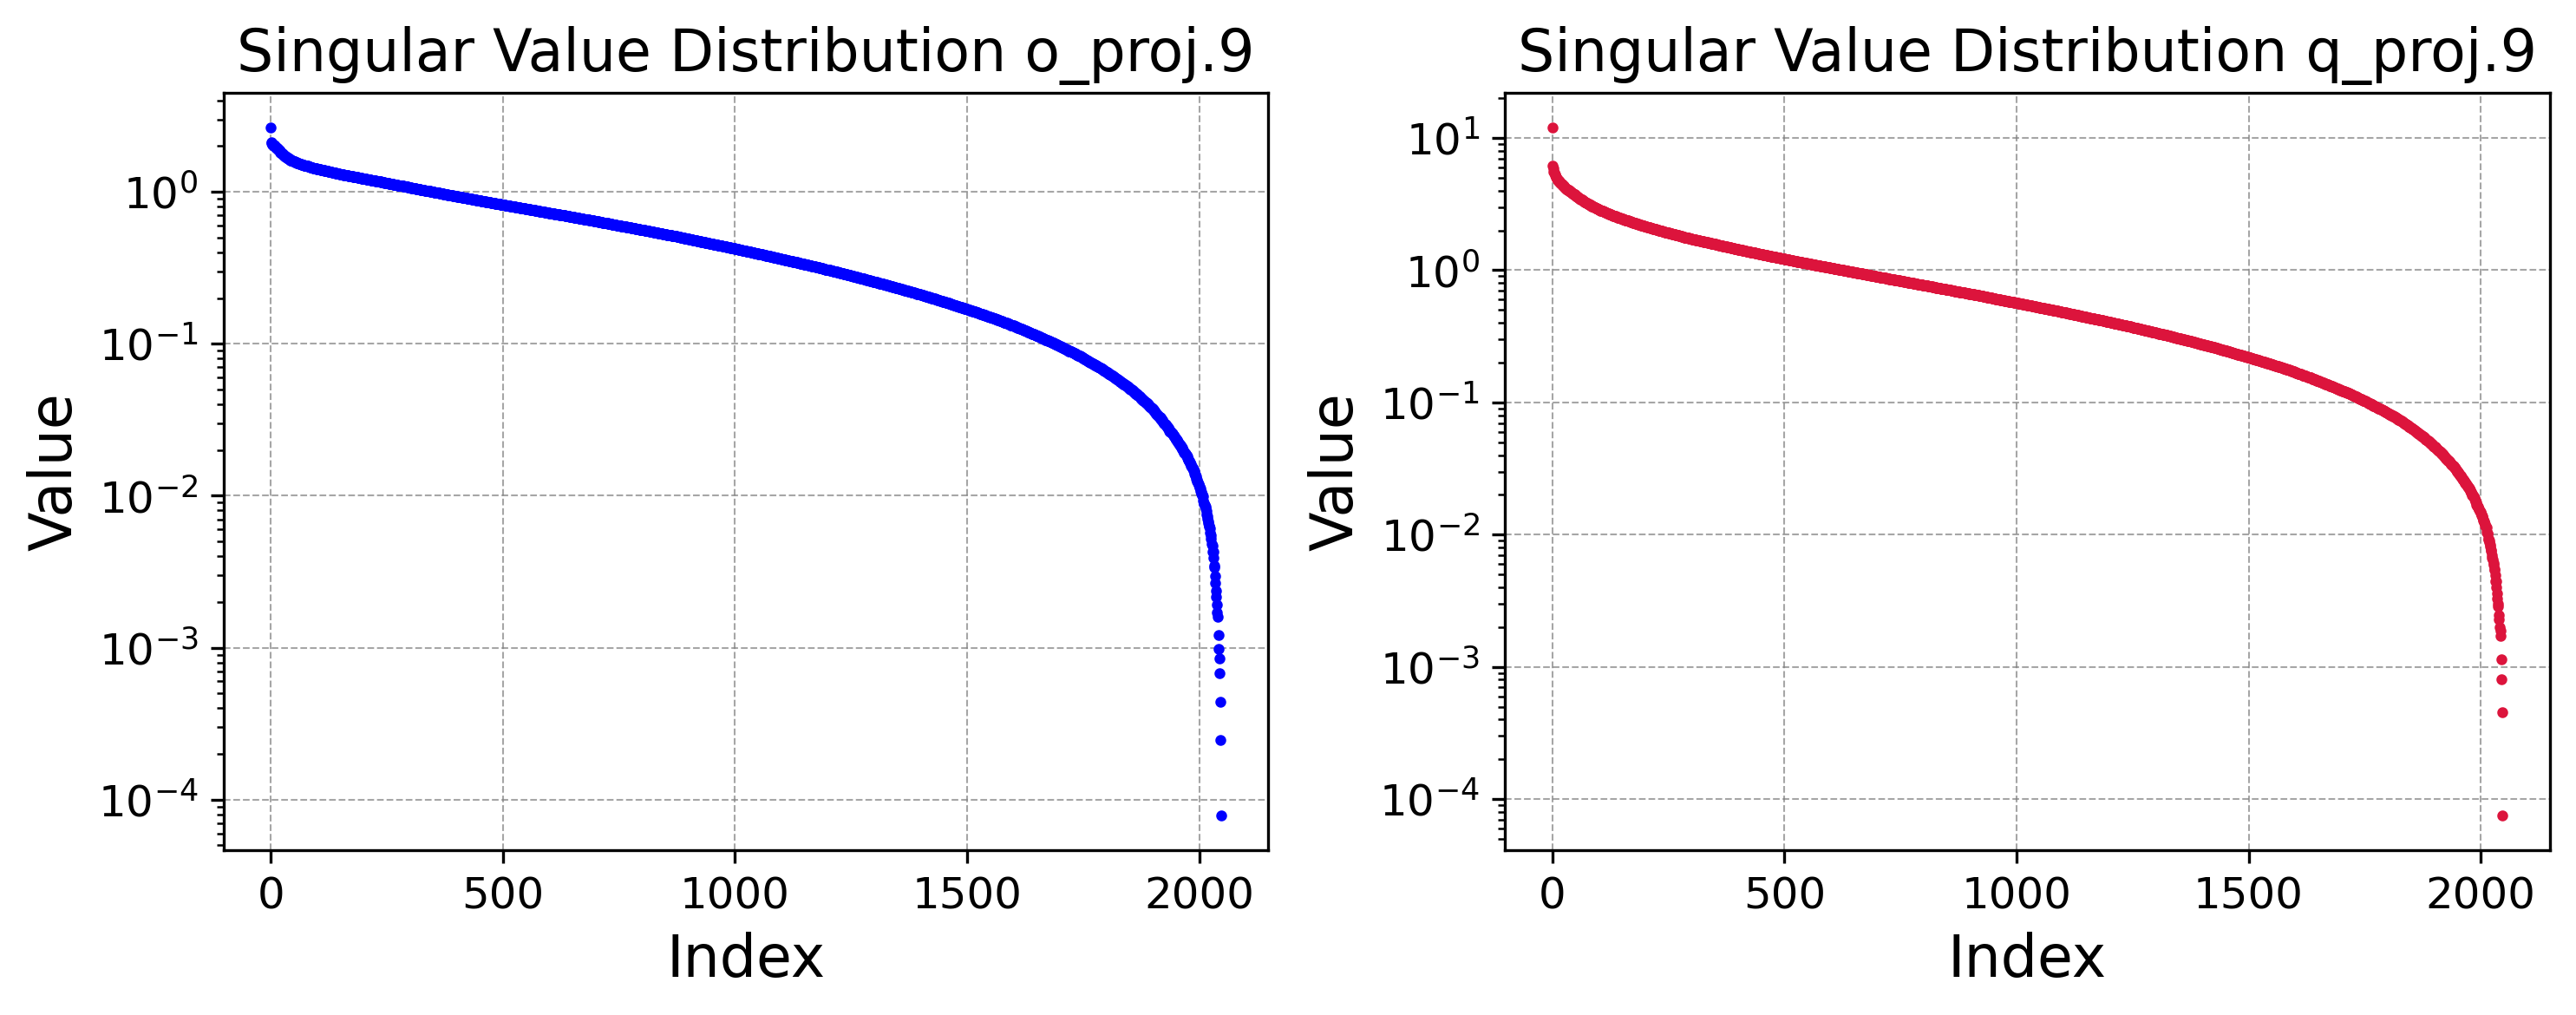

In [25]:
import matplotlib.pyplot as plt

S_o_proj = sorted_data['o_proj'][9][1]
S_q_proj = sorted_data['q_proj'][9][1]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=300)

axes[0].semilogy(S_o_proj, '.', color='blue', markersize=4)
axes[0].set_title('Singular Value Distribution o_proj.9', fontsize=size)
axes[0].set_xlabel('Index', fontsize=size)
axes[0].set_ylabel('Value', fontsize=size)
axes[0].grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
axes[0].tick_params(axis='both', which='major', labelsize=dig_size)

axes[1].semilogy(S_q_proj, '.', color='crimson', markersize=4)
axes[1].set_title('Singular Value Distribution q_proj.9', fontsize=size)
axes[1].set_xlabel('Index', fontsize=size)
axes[1].set_ylabel('Value', fontsize=size)
axes[1].grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
axes[1].tick_params(axis='both', which='major', labelsize=dig_size)

plt.tight_layout()
plt.savefig('./images/singulars_proj.pdf', format='pdf', dpi=300)

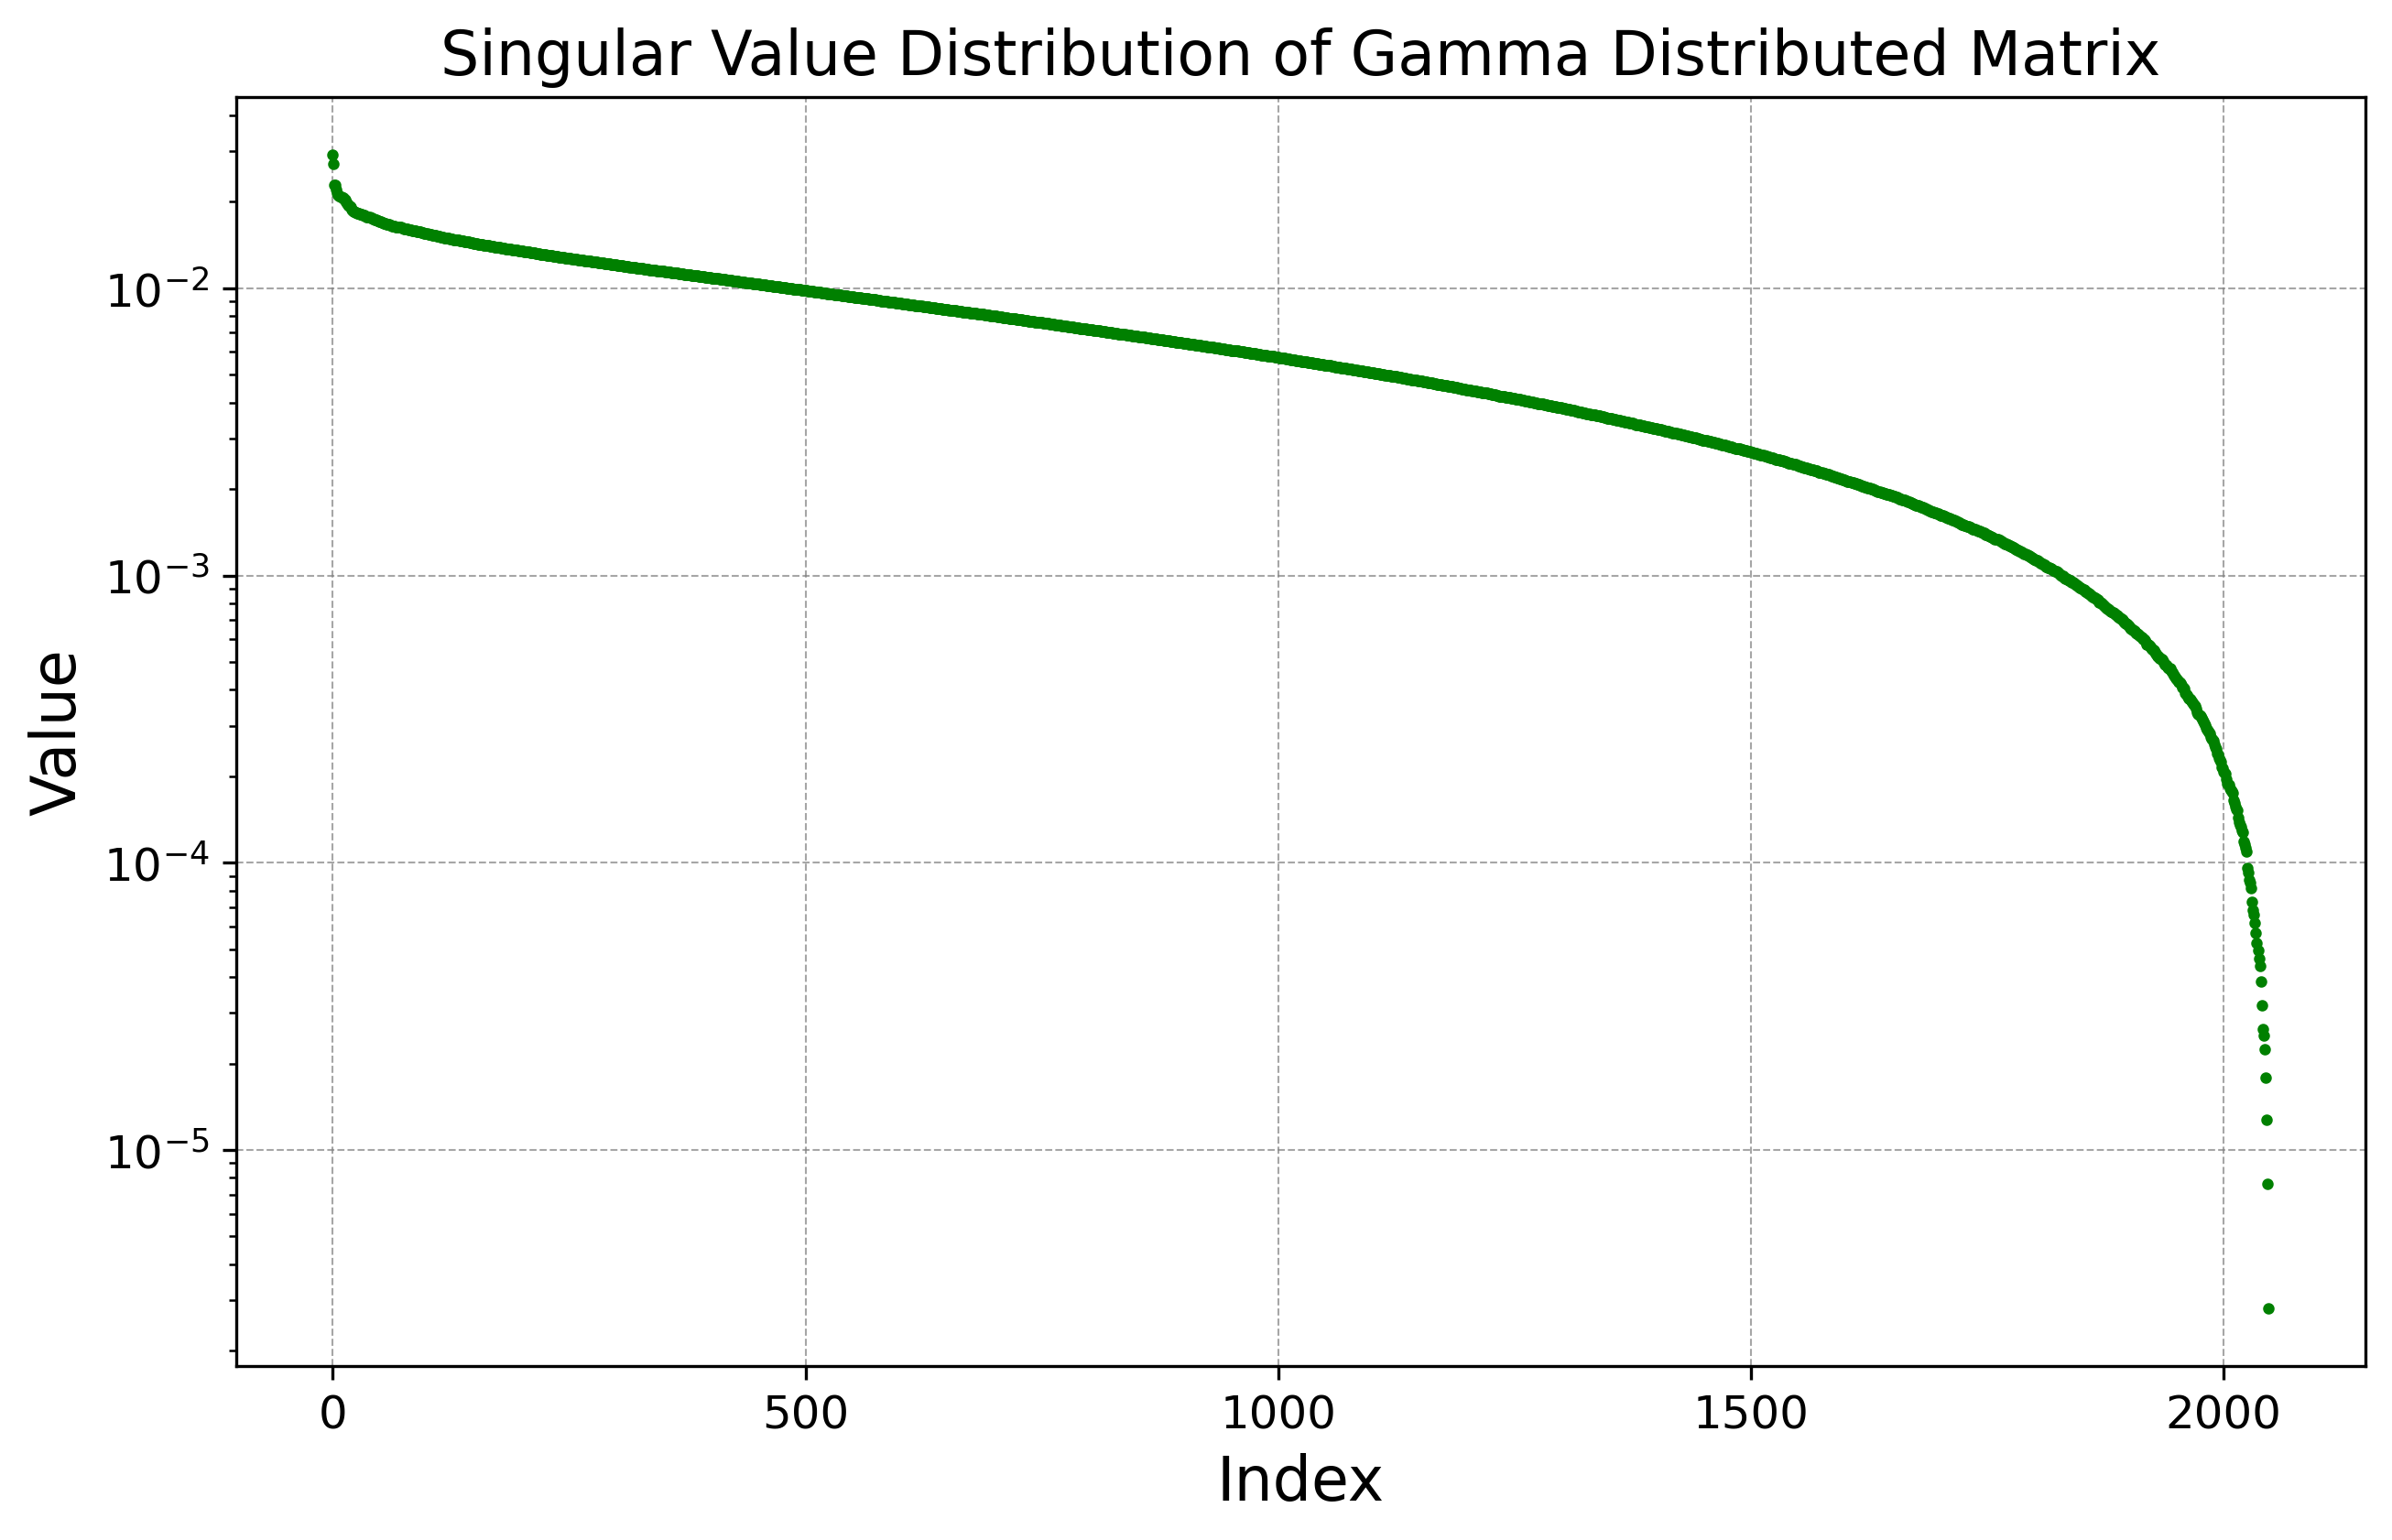

In [26]:
import torch
import matplotlib.pyplot as plt

matrix_shape = (2048, 2048)
alpha = 0.002
beta = 100

alpha = 0.005
beta = 400

Y = torch.distributions.Gamma(alpha, beta).sample(matrix_shape)

U, S, V = torch.linalg.svd(Y, full_matrices=False)

plt.figure(figsize=(10, 6), dpi=300)
plt.semilogy(S.detach().numpy(), '.', color='green', markersize=4)
plt.title('Singular Value Distribution of Gamma Distributed Matrix', fontsize=size)
plt.xlabel('Index', fontsize=size)
plt.ylabel('Value', fontsize=size)

plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=dig_size)
plt.savefig('./images/gamma_dist_sing.pdf', format='pdf', dpi=300)